In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [203]:
df=pd.read_csv(r"C:\Users\salma\Downloads\yellow_tripdata_2020-01.csv")

In [205]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [206]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [207]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


In [208]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [210]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [218]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [220]:
df.shape

(6405008, 18)

In [222]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [224]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [225]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [226]:
df['Duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['Duration']=df['Duration'].dt.total_seconds()/60

In [227]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [228]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]

In [229]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [230]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
Duration               0
dtype: int64

In [61]:
(65441/len(df))*100

1.021716132126611

In [63]:
df.dropna(inplace=True)

In [65]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [67]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
Duration           0
dtype: int64

In [238]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df.dtypes

In [ ]:
df.head()

In [98]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [242]:
df.drop_duplicates(inplace=True)

In [244]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [246]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration


In [248]:
df.shape

(3060005, 5)

In [250]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1.0    0.581981
2.0    0.190350
3.0    0.066360
5.0    0.062937
6.0    0.039272
4.0    0.036046
0.0    0.023033
7.0    0.000009
9.0    0.000006
8.0    0.000006
Name: proportion, dtype: float64

In [252]:
df = df[ < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [254]:
df.shape

(2780283, 5)

In [258]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [264]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [268]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['Duration']>0]

In [272]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x12223e40dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x12223e42290>,
 'boxes': [<matplotlib.lines.Line2D at 0x12223e53a10>],
 'medians': [<matplotlib.lines.Line2D at 0x12223e43390>],
 'fliers': [<matplotlib.lines.Line2D at 0x12223e43c90>],
 'means': []}

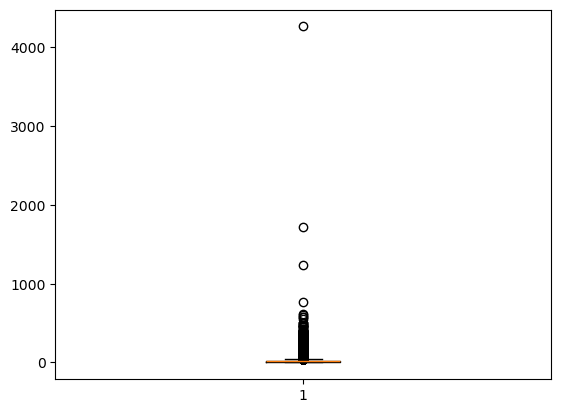

In [276]:
plt.boxplot(df['fare_amount'])

In [282]:
for col in['fare_amount','trip_distance','Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [284]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,Card,6.0,1.20,4.800000
1,1.0,Card,7.0,1.20,7.416667
2,1.0,Card,6.0,0.60,6.183333
3,1.0,Card,5.5,0.80,4.850000
5,1.0,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4.0,Card,10.5,2.40,12.383333
6339555,3.0,Card,10.0,2.09,14.800000
6339561,1.0,Card,17.5,4.11,21.500000
6339563,1.0,Card,13.0,2.13,19.000000


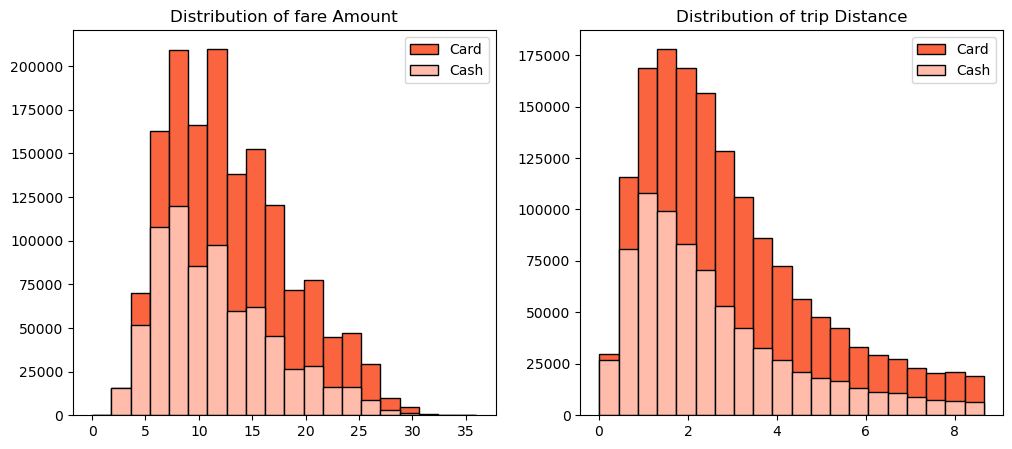

In [328]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()



plt.subplot(1,2,2)
plt.title('Distribution of trip Distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [330]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.959576  5.685148      2.936221  1.922183
Cash           11.641404  5.469962      2.558806  1.851293

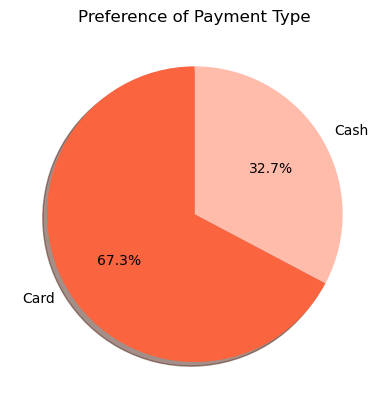

In [336]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels = df['payment_type'].value_counts().index,
       startangle=90,shadow=True,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [368]:
passenger_count

passenger_count
payment_type passenger_count                 
Card         1.0                       896946
             2.0                       325167
             3.0                       121732
             4.0                        63348
             5.0                       123391
Cash         1.0                       456394
             2.0                       154507
             3.0                        54244
             4.0                        32575
             5.0                        47393

In [372]:
passenger_count= df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

In [374]:
passenger_count

passenger_count
payment_type passenger_count                 
Card         1.0                       896946
             2.0                       325167
             3.0                       121732
             4.0                        63348
             5.0                       123391
Cash         1.0                       456394
             2.0                       154507
             3.0                        54244
             4.0                        32575
             5.0                        47393

In [382]:
passenger_count.rename(columns={'passenegr_count':'count'},inplace=True)

In [386]:
passenger_count

passenger_count
payment_type passenger_count                 
Card         1.0                       896946
             2.0                       325167
             3.0                       121732
             4.0                        63348
             5.0                       123391
Cash         1.0                       456394
             2.0                       154507
             3.0                        54244
             4.0                        32575
             5.0                        47393

In [393]:
df=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df['payment_type']=['Card','Cash']
df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df.iloc[1,1:]=passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,896946,325167,121732,63348,123391
1,Cash,456394,154507,54244,32575,47393


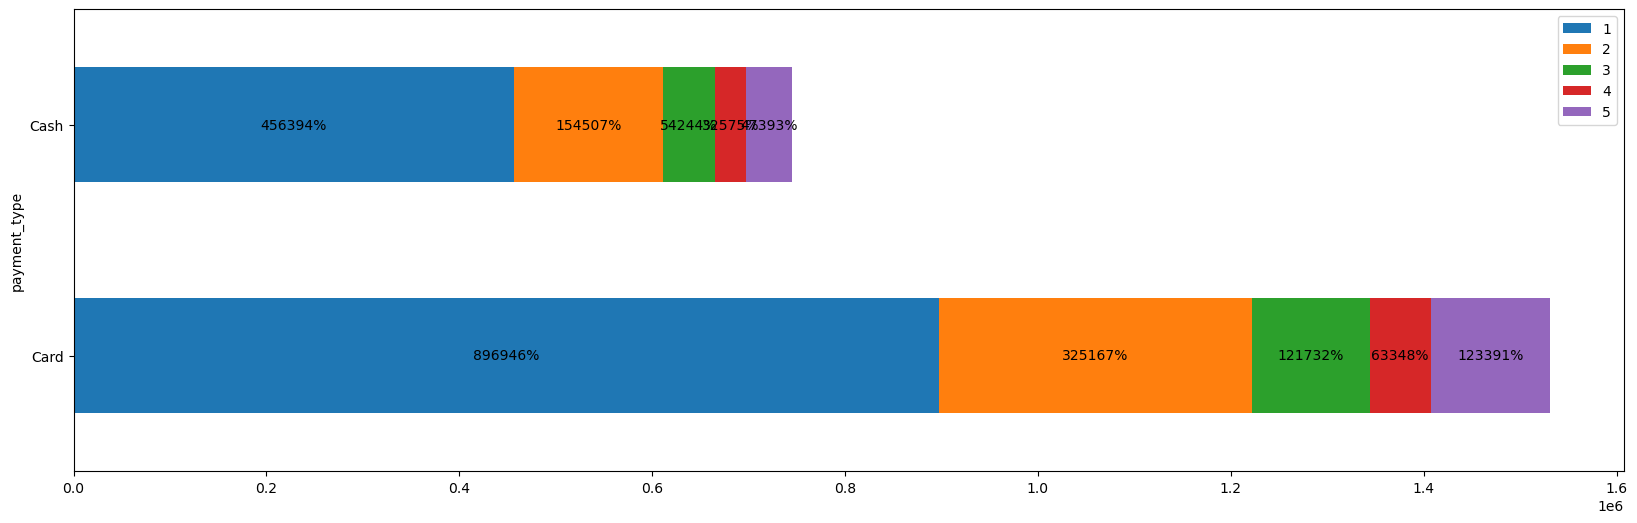

In [409]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the DataFrame as a horizontal bar chart and associate it with the existing axes (ax)
df.plot(x='payment_type', kind='barh', stacked=True, ax=ax)

# Loop through the bars (patches) to add annotations
for p in ax.patches:
    width = p.get_width()  # Width of the bar
    height = p.get_height()  # Height of the bar
    x, y = p.get_xy()  # Get the (x, y) coordinates of the bar
    
    # Add the text annotation in the center of the bar
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),  # Fixed format string
            horizontalalignment='center',
            verticalalignment='center')

# Show the plot
plt.show()

# Null hypothesis; no diffrence in average fare b/w who use credit card and who use cash

# Alternative hypothesis ; there is diffrence in average fare b/w customers who use credit card and who use cash


In [443]:
print(df.columns)

Index(['payment_type', 1, 2, 3, 4, 5], dtype='object')
